In [13]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<b>Key steps:</b> <br>
   &nbsp;&nbsp; 1. Import the data and split it<br>
   &nbsp;&nbsp; 2. Build the class and instantiate it<br>
   &nbsp;&nbsp; 3. Instantiate CELoss<br>
   &nbsp;&nbsp; 4. Instantiate Adam Optimizer<br>
   &nbsp;&nbsp; 5. Train the data<br>
   &nbsp;&nbsp; 6. Test the data without grads<br>
   &nbsp;&nbsp; 7. Take a new sample and see if it classifies it correctly<br>

#### Import data and split it

In [2]:
df=pd.read_csv('../Data/iris.csv')

In [3]:
features=df.drop('target',axis=1).values
label=df['target'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=33)

In [5]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

#### Build the class and instantiate it

In [6]:
class Model(nn.Module):
    def __init__(self,input_features=4,hidden_1=8, hidden_2=9,out=3):
        super().__init__()
        self.l1=nn.Linear(input_features,hidden_1)
        self.l2=nn.Linear(hidden_1,hidden_2)
        self.l3=nn.Linear(hidden_2,out)
        
    def forward(self,X):
        X=F.relu(self.l1(X))
        X=F.relu(self.l2(X))
        X=self.l3(X)
        return X

In [7]:
torch.manual_seed(32)
model=Model(4,8,9,3)

#### Instantiate CELoss

In [8]:
criterion = nn.CrossEntropyLoss()

#### Instantiate optimizer

In [9]:
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

#### Training the data

In [10]:
epochs=100
losses=[]

In [11]:
%timeit 
for e in range(epochs):
    y_pred=model.forward(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss)
    if e%10==0:
        print('For epoch {}, the loss is {}'.format(e,loss))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

For epoch 0, the loss is 1.1199871301651
For epoch 10, the loss is 0.9925971627235413
For epoch 20, the loss is 0.7313159108161926
For epoch 30, the loss is 0.49000686407089233
For epoch 40, the loss is 0.3710560202598572
For epoch 50, the loss is 0.2481580227613449
For epoch 60, the loss is 0.1472524106502533
For epoch 70, the loss is 0.09243608266115189
For epoch 80, the loss is 0.07043091207742691
For epoch 90, the loss is 0.061275649815797806


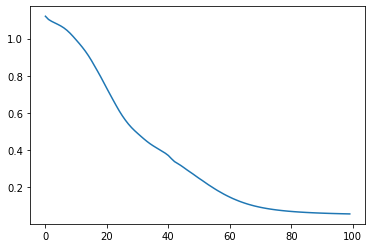

In [15]:
plt.plot(range(epochs),losses)

In [16]:
with torch.no_grad():
    y_test_pred=model.forward(X_test)
    loss=criterion(y_test_pred,y_test)
    print(loss)

tensor(0.0656)


In [30]:
correct=0
for i in range(len(y_test)):
    print('{} \t {} \t {}'.format(i+1,y_test_pred[i].argmax().item(),y_test[i]))
    if y_test_pred[i].argmax().item()==y_test[i]:
        correct+=1
print('You have got {} correct which is {} % correct'.format(correct, correct*100/len(y_test)))
print(y_test_pred[16])

1 	 1 	 1
2 	 1 	 1
3 	 0 	 0
4 	 1 	 1
5 	 2 	 2
6 	 2 	 2
7 	 0 	 0
8 	 0 	 0
9 	 2 	 2
10 	 2 	 2
11 	 2 	 2
12 	 0 	 0
13 	 2 	 2
14 	 1 	 1
15 	 2 	 2
16 	 1 	 1
17 	 1 	 2
18 	 0 	 0
19 	 1 	 1
20 	 2 	 2
21 	 0 	 0
22 	 0 	 0
23 	 2 	 2
24 	 0 	 0
25 	 2 	 2
26 	 2 	 2
27 	 1 	 1
28 	 1 	 1
29 	 2 	 2
30 	 2 	 2
You have got 29 correct which is 96.66666666666667 % correct
tensor([-3.8703,  4.1573,  4.1354])


In [26]:
mystery_iris=torch.tensor([5.6,3.7,2.2,0.5])

In [28]:
y_pred=model(mystery_iris)
print(y_pred)
print('The correct class is {}'.format(y_pred.argmax().item()))

tensor([  8.1056,   3.2273, -13.5074], grad_fn=<AddBackward0>)
The correct class is 0
